In [19]:
# !pip install yfinance
# !pip install tabulate

In [20]:
from datetime import datetime
from tabulate import tabulate
import pandas as pd
import matplotlib.pyplot as plt

# **Reading the Dataset and preparing it for my usecase**

1. Setting the *Date* column as my index
2. Dropping the unecessary *Field* column

**NOTE:**

> *FIBBG000B9XRY4* is the ID used to represent the Apple Stocks



In [21]:
prices = pd.read_excel('/content/drive/MyDrive/AAPL_STOCKS_2023.xlsx')


prices.set_index('Date', inplace=True)
prices.drop('Field', axis = 1,  inplace=True)

prices

,FIBBG000B9XRY4
Date,
2023-01-03,124.2163
2023-01-04,125.4975
2023-01-05,124.1666
2023-01-06,128.7352
2023-01-09,129.2616
...,...
2023-12-22,193.3533
2023-12-26,192.8040
2023-12-27,192.9038


# **Visualization of the Apple stocks in the given Time-Frame**

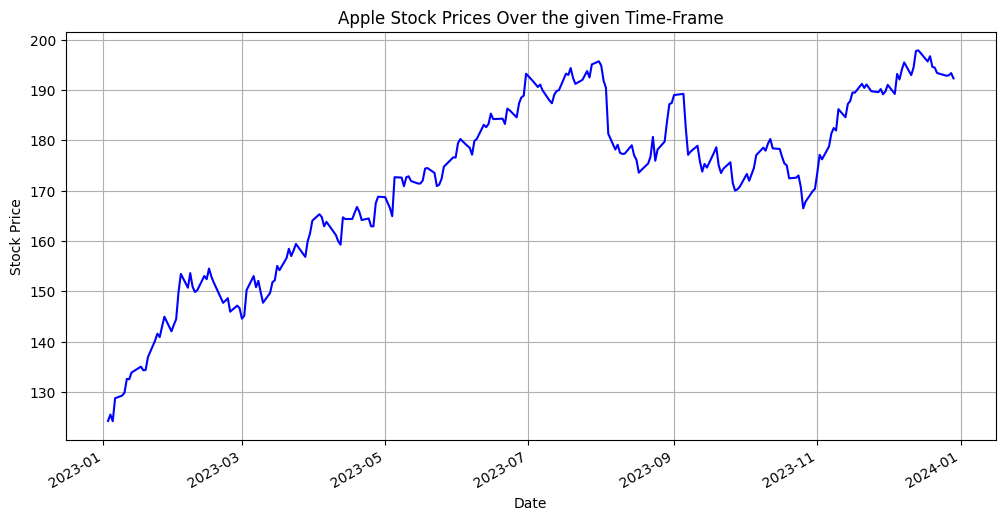

In [22]:
prices['FIBBG000B9XRY4'].plot(figsize=(12, 6), color='blue', linestyle='-')

plt.title('Apple Stock Prices Over the given Time-Frame')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

# **Converting the Data to list of tuples for the ease of use, and appending the dates along with the closing prices**

In [23]:
closing_prices = []

# Iterate over the series
for date, value in prices.iloc[:,0].items():
    closing_prices.append((str(date.date()), value))

print(closing_prices, len(closing_prices))



[('2023-01-03', 124.2163), ('2023-01-04', 125.4975), ('2023-01-05', 124.1666), ('2023-01-06', 128.7352), ('2023-01-09', 129.2616), ('2023-01-10', 129.8377), ('2023-01-11', 132.5788), ('2023-01-12', 132.4994), ('2023-01-13', 133.8402), ('2023-01-17', 135.0121), ('2023-01-18', 134.2871), ('2023-01-19', 134.3467), ('2023-01-20', 136.9289), ('2023-01-23', 140.1468), ('2023-01-24', 141.5571), ('2023-01-25', 140.8917), ('2023-01-26', 142.9774), ('2023-01-27', 144.9339), ('2023-01-30', 142.0239), ('2023-01-31', 143.3051), ('2023-02-01', 144.4373), ('2023-02-02', 149.7905), ('2023-02-03', 153.4454), ('2023-02-06', 150.6943), ('2023-02-07', 153.5944), ('2023-02-08', 150.883), ('2023-02-09', 149.8402), ('2023-02-10', 150.2082), ('2023-02-13', 153.0332), ('2023-02-14', 152.3866), ('2023-02-15', 154.5053), ('2023-02-16', 152.8939), ('2023-02-17', 151.7401), ('2023-02-21', 147.6917), ('2023-02-22', 148.1194), ('2023-02-23', 148.6068), ('2023-02-24', 145.9311), ('2023-02-27', 147.1346), ('2023-02-28

# **Did the following in the current code section:**
1. Calculating the returns from the closed prices.
2. Then calculating the states of each price of the stock each day with the help of returns.
3. Also appending the Dates along with states

In [24]:
def find_returns_and_states(data):
    returns_and_states = []

    for i in range(1, len(data)):
        # Calculate daily returns
        returns = (data[i][1] - data[i-1][1]) / data[i-1][1]

        # Classify states
        if returns >= 0.01:    # Checking if the returns are greater or equal to 1% and assign state = 1
            state = 1
        elif returns > -0.01:  # Checking if the returns are greater or equal to 1% and assign state = 0
            state = 0
        else:                  # Applying s = -1 for all other return values
            state = -1

        # Appending timestamp and state to the list
        returns_and_states.append((data[i][0], state))

    return returns_and_states

# Call the function with the list of tuples
states = find_returns_and_states(closing_prices)

len(states)

249

# **Calculating the Transition Distribution and displaying it.**

In [25]:
def calculate_transition_distribution(states):
    # Dictionary to store transition counts
    transition_counts = {
        1: {1: 0, 0: 0, -1: 0},
        0: {1: 0, 0: 0, -1: 0},
        -1: {1: 0, 0: 0, -1: 0}
    }

    for i in range(len(states) - 1):
        current_state = states[i][1]
        next_state = states[i+1][1]

        # Updating transition counts
        transition_counts[current_state][next_state] += 1

    # Calculating transition probabilities
    transition_distribution = {}
    for state, transitions in transition_counts.items():
        total_transitions = sum(transitions.values())
        if total_transitions > 0:
            transition_probs = {next_state: count / total_transitions for next_state, count in transitions.items()}
        else:
            transition_probs = {next_state: 0 for next_state in transitions}
        transition_distribution[state] = transition_probs

    return transition_distribution

# Calling the function with the 'states' list
transition_distribution = calculate_transition_distribution(states)

# print(transition_distribution)

# Mapping integer keys to corresponding labels
label_map = {1: "Bullish", 0: "Flat", -1: "Bearish"}

# Converting the dictionary to a list of lists
table = []
for row_key in transition_distribution.keys():
    row = [label_map[row_key]]
    for col_key in transition_distribution[row_key].keys():
        row.append("{:.6f}".format(transition_distribution[row_key][col_key]))
    table.append(row)

# Printing the labeled 2D Transition Distribution list with grids
print("\nTransition Distribution: \n")
print(tabulate(table, headers=[""] + list(label_map.values()), tablefmt="grid"))




Transition Distribution: 

+---------+-----------+----------+-----------+
|         |   Bullish |     Flat |   Bearish |
+=========+===========+==========+===========+
| Bullish |  0.196429 | 0.678571 |  0.125    |
+---------+-----------+----------+-----------+
| Flat    |  0.254777 | 0.598726 |  0.146497 |
+---------+-----------+----------+-----------+
| Bearish |  0.114286 | 0.742857 |  0.142857 |
+---------+-----------+----------+-----------+


# **Calculating the optimal days to buy the stock inorder to maximise the portfolio value**

In [26]:


def calculate_portfolio_value(states):
    V = 0  # Initial portfolio value
    buy_indices = []
    buy_dates = []
    state = "Flat"  # Initialize the current state as "Flat"

    # Initialize dictionary (memo) to hold the state combinations of current_day and next_day
    memo = {(1, 0): 1, (-1, 0): -1}

    # Iterate through each state transition
    for i in range(len(states) - 1):
        current_state = states[i][1]
        next_state = states[i + 1][1]

        # If the state comibination satisfies any of the one present in the dictionary then that value is taken as their portfolio value on that day
        if (next_state, current_state) in memo:
            V += memo[(next_state, current_state)]
            if memo[(next_state, current_state)] == 1:
                buy_indices.append(i + 1)  # Index of the day to buy
                buy_dates.append(states[i + 1][0]) # dates to buy

    return V, buy_indices, buy_dates


portfolio_value, optimal_buy_indices, optimal_buy_dates = calculate_portfolio_value(states)

print("\nOptimal portfolio value (V(N)): ", portfolio_value)
print("\nOptimal buy indices: ", optimal_buy_indices)
print("\nOptimal buy dates: ", optimal_buy_dates)
print(f"\nLength of the Optimal Buy indices: {len(optimal_buy_indices)} \n\nLength of the Optimal buy dates: {len(optimal_buy_dates)}")



Optimal portfolio value (V(N)):  17

Optimal buy indices:  [5, 7, 11, 15, 20, 27, 29, 40, 49, 51, 58, 60, 68, 78, 84, 87, 93, 99, 102, 107, 109, 112, 116, 119, 122, 132, 141, 159, 163, 176, 186, 190, 206, 208, 211, 215, 217, 231, 233, 237]

Optimal buy dates:  ['2023-01-11', '2023-01-13', '2023-01-20', '2023-01-26', '2023-02-02', '2023-02-13', '2023-02-15', '2023-03-03', '2023-03-16', '2023-03-20', '2023-03-29', '2023-03-31', '2023-04-13', '2023-04-27', '2023-05-05', '2023-05-10', '2023-05-18', '2023-05-26', '2023-06-01', '2023-06-08', '2023-06-12', '2023-06-15', '2023-06-22', '2023-06-27', '2023-06-30', '2023-07-17', '2023-07-28', '2023-08-23', '2023-08-29', '2023-09-18', '2023-10-02', '2023-10-06', '2023-10-30', '2023-11-01', '2023-11-06', '2023-11-10', '2023-11-14', '2023-12-05', '2023-12-07', '2023-12-13']

Length of the Optimal Buy indices: 40 

Length of the Optimal buy dates: 40
